In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('menu.csv')

In [4]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
for column in df.columns:
    df = df.rename(columns={column : column.replace("(% Daily Value)", "DV")} )
for column in df.columns:
    df = df.rename(columns={column : column.replace(" ", "_")})
    
if 'Serving_Size' in df.columns:
    df['Serving_Size_g'] = None
    for i,value in enumerate(df['Serving_Size']):
        if (value.find('fl') < 0 and value.find('ml') < 0):
            value = (value[value.find("(")+1:value.find(" g")])
            df['Serving_Size_g'][i] = np.float64(value)
            df['Serving_Size'][i] = None
        else:
            if (value.find(' fl') > 0):
                df['Serving_Size'][i] = (np.float64(value[0:value.find(' fl')]) * 29.57)
            elif (value.find(' ml') > 0):
                df['Serving_Size'][i] = np.float64(value[value.find(' ml')-3:value.find(' ml')])

    df = df.rename(columns={"Serving_Size": "Serving_Size_ml"})

    if (df.columns.tolist()[3] != "Serving_Size_g"):
        cols = df.columns.tolist()
        cols = cols[:3] + cols[-1:] + cols[-22:-1]
        df = df[cols]

    df['Serving_Size_g'] = np.float64(df['Serving_Size_g'])
    df['Serving_Size_ml'] = np.float64(df['Serving_Size_ml'])

display(df.dtypes)

Category              object
Item                  object
Serving_Size_ml      float64
Serving_Size_g       float64
Calories               int64
Calories_from_Fat      int64
Total_Fat            float64
Total_Fat_DV           int64
Saturated_Fat        float64
Saturated_Fat_DV       int64
Trans_Fat            float64
Cholesterol            int64
Cholesterol_DV         int64
Sodium                 int64
Sodium_DV              int64
Carbohydrates          int64
Carbohydrates_DV       int64
Dietary_Fiber          int64
Dietary_Fiber_DV       int64
Sugars                 int64
Protein                int64
Vitamin_A_DV           int64
Vitamin_C_DV           int64
Calcium_DV             int64
Iron_DV                int64
dtype: object

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           260 non-null    object 
 1   Item               260 non-null    object 
 2   Serving_Size_ml    142 non-null    float64
 3   Serving_Size_g     118 non-null    float64
 4   Calories           260 non-null    int64  
 5   Calories_from_Fat  260 non-null    int64  
 6   Total_Fat          260 non-null    float64
 7   Total_Fat_DV       260 non-null    int64  
 8   Saturated_Fat      260 non-null    float64
 9   Saturated_Fat_DV   260 non-null    int64  
 10  Trans_Fat          260 non-null    float64
 11  Cholesterol        260 non-null    int64  
 12  Cholesterol_DV     260 non-null    int64  
 13  Sodium             260 non-null    int64  
 14  Sodium_DV          260 non-null    int64  
 15  Carbohydrates      260 non-null    int64  
 16  Carbohydrates_DV   260 non

,Serving_Size_ml,Serving_Size_g,Calories,Calories_from_Fat,Total_Fat,Total_Fat_DV,Saturated_Fat,Saturated_Fat_DV,Trans_Fat,Cholesterol,...,Carbohydrates,Carbohydrates_DV,Dietary_Fiber,Dietary_Fiber_DV,Sugars,Protein,Vitamin_A_DV,Vitamin_C_DV,Calcium_DV,Iron_DV
count,142.000000,118.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,518.903965,204.313559,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,163.296145,100.126219,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,177.420000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,354.840000,143.000000,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,473.120000,183.500000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,620.970000,254.000000,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,946.240000,646.000000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [7]:
df['Category'].value_counts()

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Category               0
Item                   0
Serving_Size_ml      118
Serving_Size_g       142
Calories               0
Calories_from_Fat      0
Total_Fat              0
Total_Fat_DV           0
Saturated_Fat          0
Saturated_Fat_DV       0
Trans_Fat              0
Cholesterol            0
Cholesterol_DV         0
Sodium                 0
Sodium_DV              0
Carbohydrates          0
Carbohydrates_DV       0
Dietary_Fiber          0
Dietary_Fiber_DV       0
Sugars                 0
Protein                0
Vitamin_A_DV           0
Vitamin_C_DV           0
Calcium_DV             0
Iron_DV                0
dtype: int64

In [9]:
df['Serving_Size_g']=df['Serving_Size_g'].fillna(0)
df['Serving_Size_ml']=df['Serving_Size_ml'].fillna(0)

In [10]:
df.isnull().sum()

Category             0
Item                 0
Serving_Size_ml      0
Serving_Size_g       0
Calories             0
Calories_from_Fat    0
Total_Fat            0
Total_Fat_DV         0
Saturated_Fat        0
Saturated_Fat_DV     0
Trans_Fat            0
Cholesterol          0
Cholesterol_DV       0
Sodium               0
Sodium_DV            0
Carbohydrates        0
Carbohydrates_DV     0
Dietary_Fiber        0
Dietary_Fiber_DV     0
Sugars               0
Protein              0
Vitamin_A_DV         0
Vitamin_C_DV         0
Calcium_DV           0
Iron_DV              0
dtype: int64

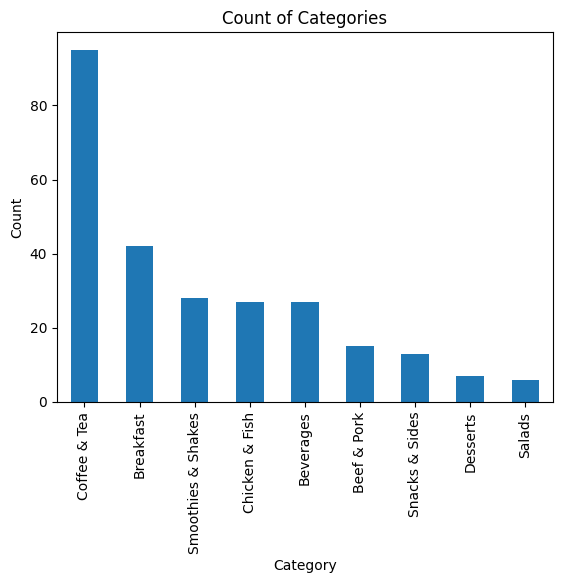

In [11]:
grouped_counts = df['Category'].value_counts()

# Plot using Matplotlib
grouped_counts.plot(kind='bar')
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

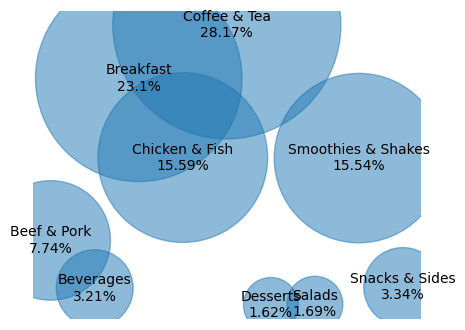

In [12]:
calories_per_category = df.groupby('Category')['Calories'].sum()

total_calories = df['Calories'].sum()
percentage_calories = calories_per_category / total_calories * 100

plt.figure(figsize=(5, 4))
plt.scatter(percentage_calories.index, percentage_calories, s=calories_per_category, alpha=0.5)

for category, percentage, calories in zip(percentage_calories.index, percentage_calories, calories_per_category):
    plt.text(category, percentage, f'{category}\n{round(percentage, 2)}%', ha='center', va='center')

plt.xlabel('Category')
plt.ylabel('Percentage of Calories')
plt.grid(True)
plt.axis('off') 
plt.show()

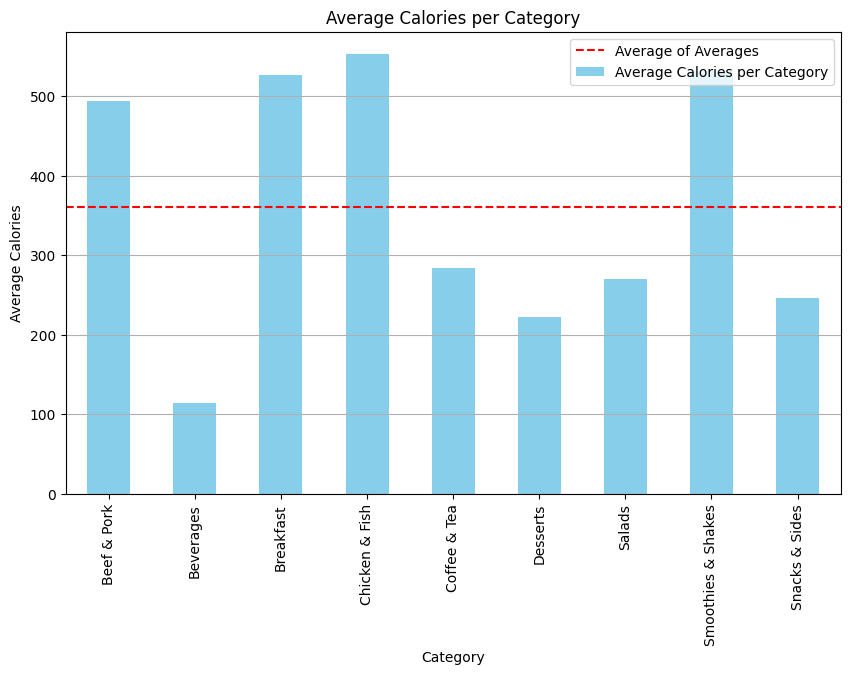

In [14]:
avg_calories_per_category = df.groupby('Category')['Calories'].mean()
average_of_averages = avg_calories_per_category.mean() 

# Plotting the average calorie per category
plt.figure(figsize=(10, 6))
avg_calories_per_category.plot(kind='bar', color='skyblue', label='Average Calories per Category')
plt.axhline(average_of_averages, color='red', linestyle='--', label='Average of Averages')  # Add target line
plt.title('Average Calories per Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y')
plt.show()

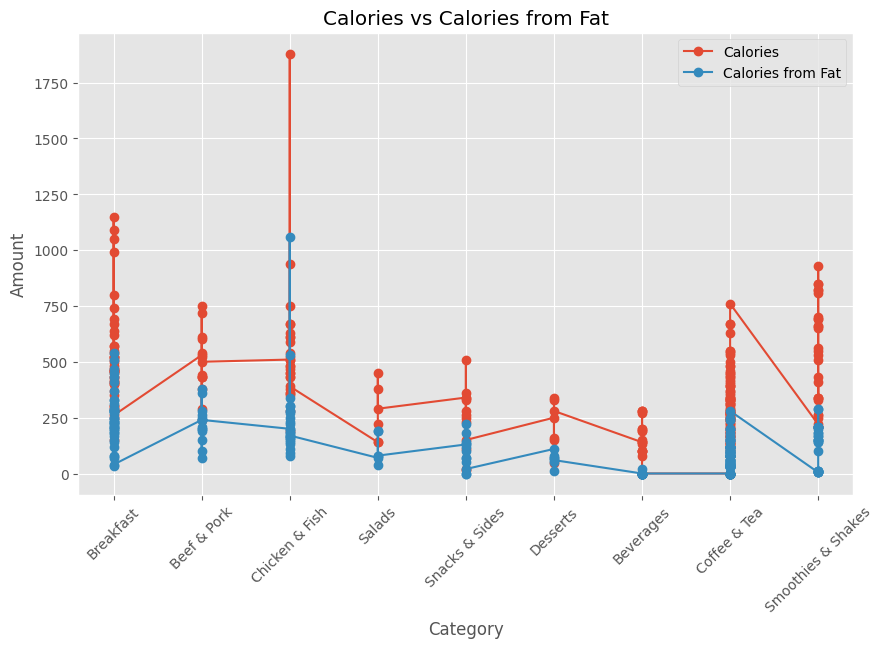

In [44]:
plt.figure(figsize=(10, 6)) 
plt.plot(df['Category'], df['Calories'], marker='o', label='Calories')
plt.plot(df['Category'], df['Calories_from_Fat'], marker='o', label='Calories from Fat')
plt.title('Calories vs Calories from Fat')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

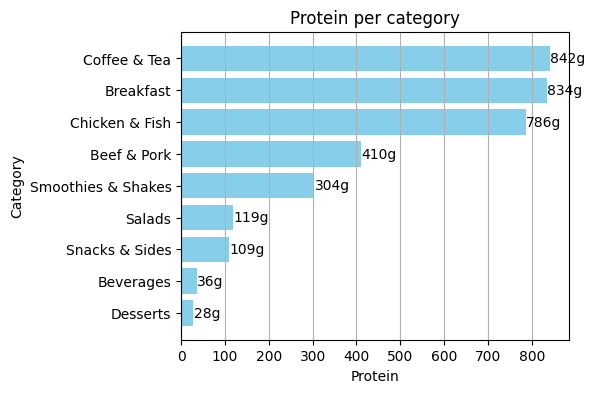

In [15]:
grouped_df = df.groupby('Category')['Protein'].sum().reset_index().sort_values(by='Protein', ascending=False)

plt.figure(figsize=(5, 4))
for i, (category, protein) in enumerate(grouped_df[['Category', 'Protein']].itertuples(index=False), 1):
    plt.barh(i, protein, color='skyblue')
    plt.text(protein + 0.5, i, f'{protein}g', va='center', fontsize=10) 

plt.title('Protein per category')
plt.xlabel('Protein')
plt.ylabel('Category')
plt.yticks(range(1, len(grouped_df) + 1), grouped_df['Category'])  
plt.gca().invert_yaxis()  
plt.grid(axis='x')  
plt.show()

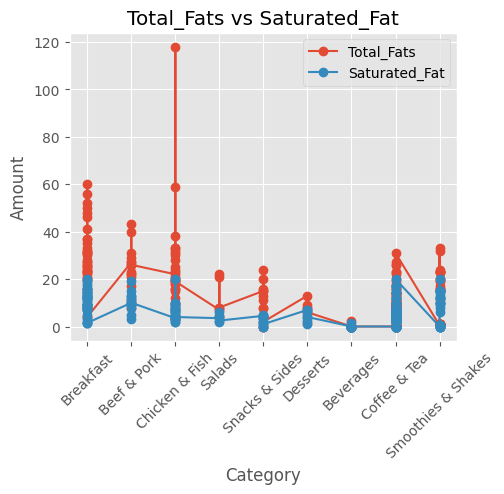

In [43]:
plt.figure(figsize=(5,4)) 
plt.plot(df['Category'], df['Total_Fat'], marker='o', label='Total_Fats')
plt.plot(df['Category'], df['Saturated_Fat'], marker='o', label='Saturated_Fat')
plt.title('Total_Fats vs Saturated_Fat')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Sodium_DV', ylabel='Calories'>

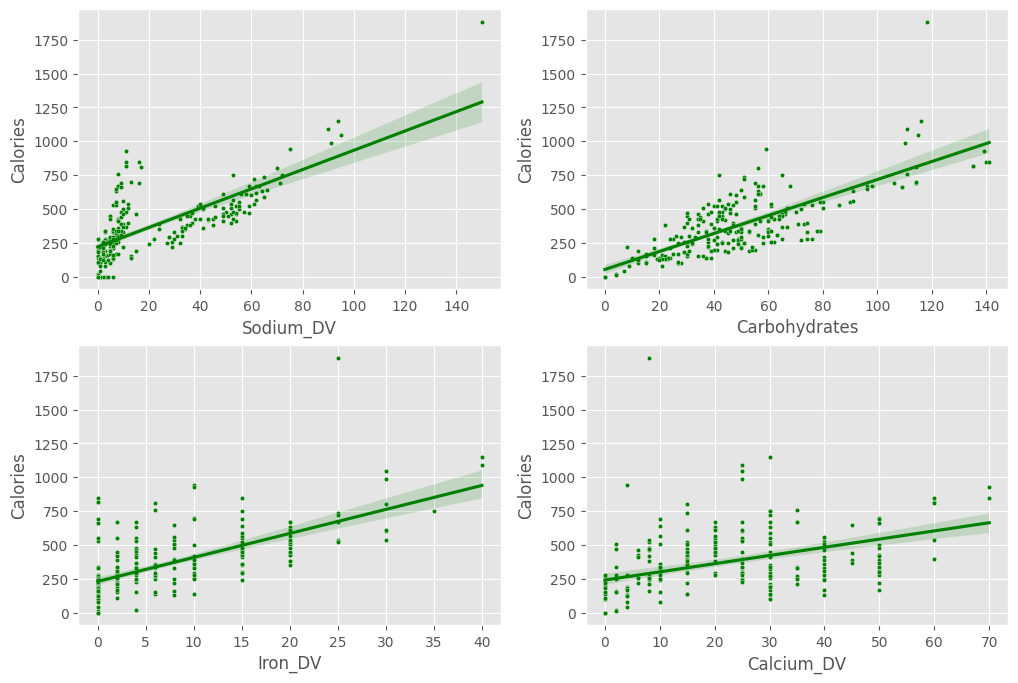

In [42]:
fig, axes = plt.subplots( 2, 2, figsize=(12, 8))
plt.style.use('ggplot')
color1 = '#3BB143'
color2 = "#3575D5"



sns.scatterplot(ax = axes[0,1], x = 'Carbohydrates', y = 'Calories', data = df, s = 10, color = 'green')
sns.regplot(ax = axes[0,1], x = 'Carbohydrates', y = 'Calories',scatter=False, data = df, color = 'green')

sns.scatterplot(ax = axes[1,0], x = 'Iron_DV', y = 'Calories', data = df, s = 10, color = 'green')
sns.regplot(ax = axes[1,0], x = 'Iron_DV', y = 'Calories',scatter=False, data = df, color = 'green')

sns.scatterplot(ax = axes[1,1], x = 'Calcium_DV', y = 'Calories', data = df, s = 10, color = 'green')
sns.regplot(ax = axes[1,1], x = 'Calcium_DV', y = 'Calories',scatter=False, data = df, color = 'green')

sns.scatterplot(ax = axes[0,0], x = 'Sodium_DV', y = 'Calories', data = df, s = 10, color = 'green')
sns.regplot(ax = axes[0,0], x = 'Sodium_DV', y = 'Calories',scatter=False, data = df, color = 'green')

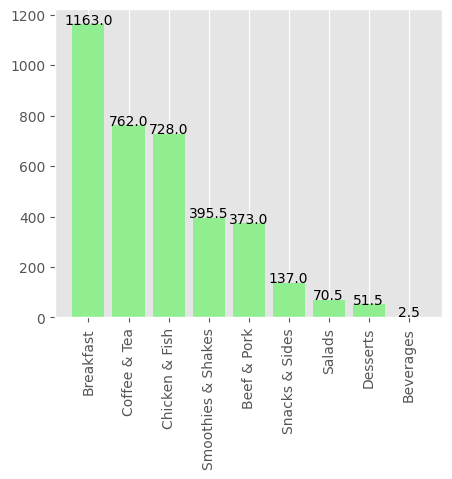

In [17]:
grouped_df = df.groupby('Category')['Total_Fat'].sum().reset_index().sort_values(by='Total_Fat', ascending=False)

plt.figure(figsize=(5, 4))
plt.bar(grouped_df['Category'], grouped_df['Total_Fat'], color='lightgreen')

for index, value in enumerate(grouped_df['Total_Fat']):
    plt.text(index, value + 0.5, str(value), ha='center')


plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

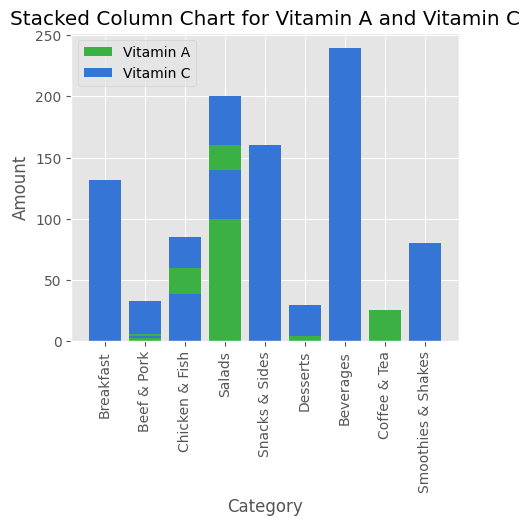

In [41]:
fig, ax = plt.subplots(figsize=(5,4))
plt.style.use('ggplot')

# Plot Vitamin A
ax.bar(df['Category'], df['Vitamin_A_DV'], label='Vitamin A', color='#3BB143')

# Plot Vitamin B on top of Vitamin A
ax.bar(df['Category'], df['Vitamin_C_DV'], bottom=df['Vitamin_A_DV'], label='Vitamin C', color='#3575D5')

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Amount')
ax.set_title('Stacked Column Chart for Vitamin A and Vitamin C')
ax.legend()
plt.xticks(rotation=90)

plt.show()

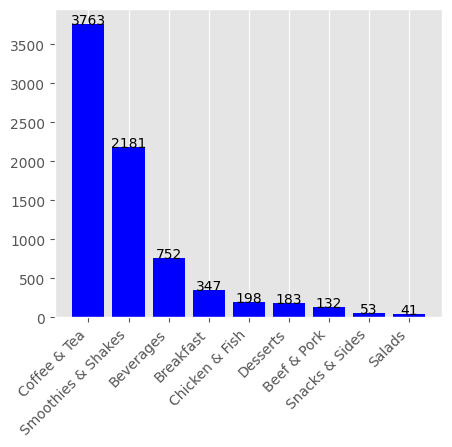

In [19]:
grouped_df = df.groupby('Category')['Sugars'].sum().reset_index().sort_values(by='Sugars', ascending=False)

# Plotting a Chart
plt.figure(figsize=(5, 4))
plt.bar(grouped_df['Category'], grouped_df['Sugars'], color='blue')

for index, value in enumerate(grouped_df['Sugars']):
    plt.text(index, value + 0.5, str(value), ha='center')


plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()